# Random Forest Regressor

# References


[sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

[1.11.2. Forests of randomized trees](https://scikit-learn.org/stable/modules/ensemble.html#forest)


[Random Forest Regression](https://medium.com/swlh/random-forest-and-its-implementation-71824ced454f)

[Painless Random Forest Regression in Python – Step-by-Step with Sklearn](https://onestopdataanalysis.com/python-random-forest-regression/)

[Random forest](https://ru.wikipedia.org/wiki/Random_forest)

[Бэггинг](https://ru.wikipedia.org/wiki/%D0%91%D1%8D%D0%B3%D0%B3%D0%B8%D0%BD%D0%B3)

[How to Visualize a Decision Tree from a Random Forest in Python using Scikit-Learn](https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c)

# References


## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
# !conda install -c conda-forge shap -y

In [4]:
import scipy
from scipy import stats

scipy.__version__

'1.6.2'

In [5]:
import numpy as np

np.__version__

'1.20.2'

In [6]:
import pandas as pd

pd.__version__

'1.2.4'

In [7]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [8]:
import seaborn as sns

sns.__version__

'0.11.1'

In [9]:
import shap

shap.__version__

'0.39.0'

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Загрузка данных

[Источник (Calculate Concrete Strength)](https://www.kaggle.com/prathamtripathi/regression-with-neural-networking)

In [11]:
df = pd.read_csv("./../../data/concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## Разделение данных на `X` и `y`

In [12]:
target = "Strength"

In [13]:
from sklearn.model_selection import train_test_split

y = df[target].copy()
X = df.drop(columns=[target]).copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

## Random Forest (Случайный лес) Regressor

[sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Основная идея заключается в использовании большого **ансамбля решающих деревьев (decision tree)**, каждое из которых само по себе даёт очень невысокое качество, но за счёт их большого количества результат получается хорошим.

Алгоритм применяется для задач **классификации, регрессии и кластеризации**.

**Достоинства:**
- Способность эффективно обрабатывать данные с большим числом признаков и классов.
- Нечувствительность к масштабированию (и вообще к любым монотонным преобразованиям) значений признаков.
- Одинаково хорошо обрабатываются как непрерывные, так и дискретные признаки. Существуют методы построения деревьев по данным с пропущенными значениями признаков.
- Существуют методы оценивания значимости отдельных признаков в модели.
- Внутренняя оценка способности модели к обобщению (тест по неотобранным образцам out-of-bag).
- Высокая параллелизуемость и масштабируемость.

**Недостатки:**
- Большой размер получающихся моделей. Требуется $O(K)$ памяти для хранения модели, где $K$ — число деревьев.

<center><img src="https://raw.githubusercontent.com/ryndovaira-org/data_science_notes/main/images/random_forest.png"/></center>

# References

<center><img src="https://raw.githubusercontent.com/ryndovaira-org/data_science_notes/main/images/random_forest_2.png"/></center>

<center><img src="https://raw.githubusercontent.com/ryndovaira-org/data_science_notes/main/images/random_forest_regression_line.png"/></center>

In [46]:
# TODO: количество фич в деревьях леса всегда одинаковое?
# TODO: как они выбираются?
# TODO: дообучение?
# TODO: вопрос к большому объему данных в частности (50Гб)
# TODO: dask

## Анализ числовых признаков

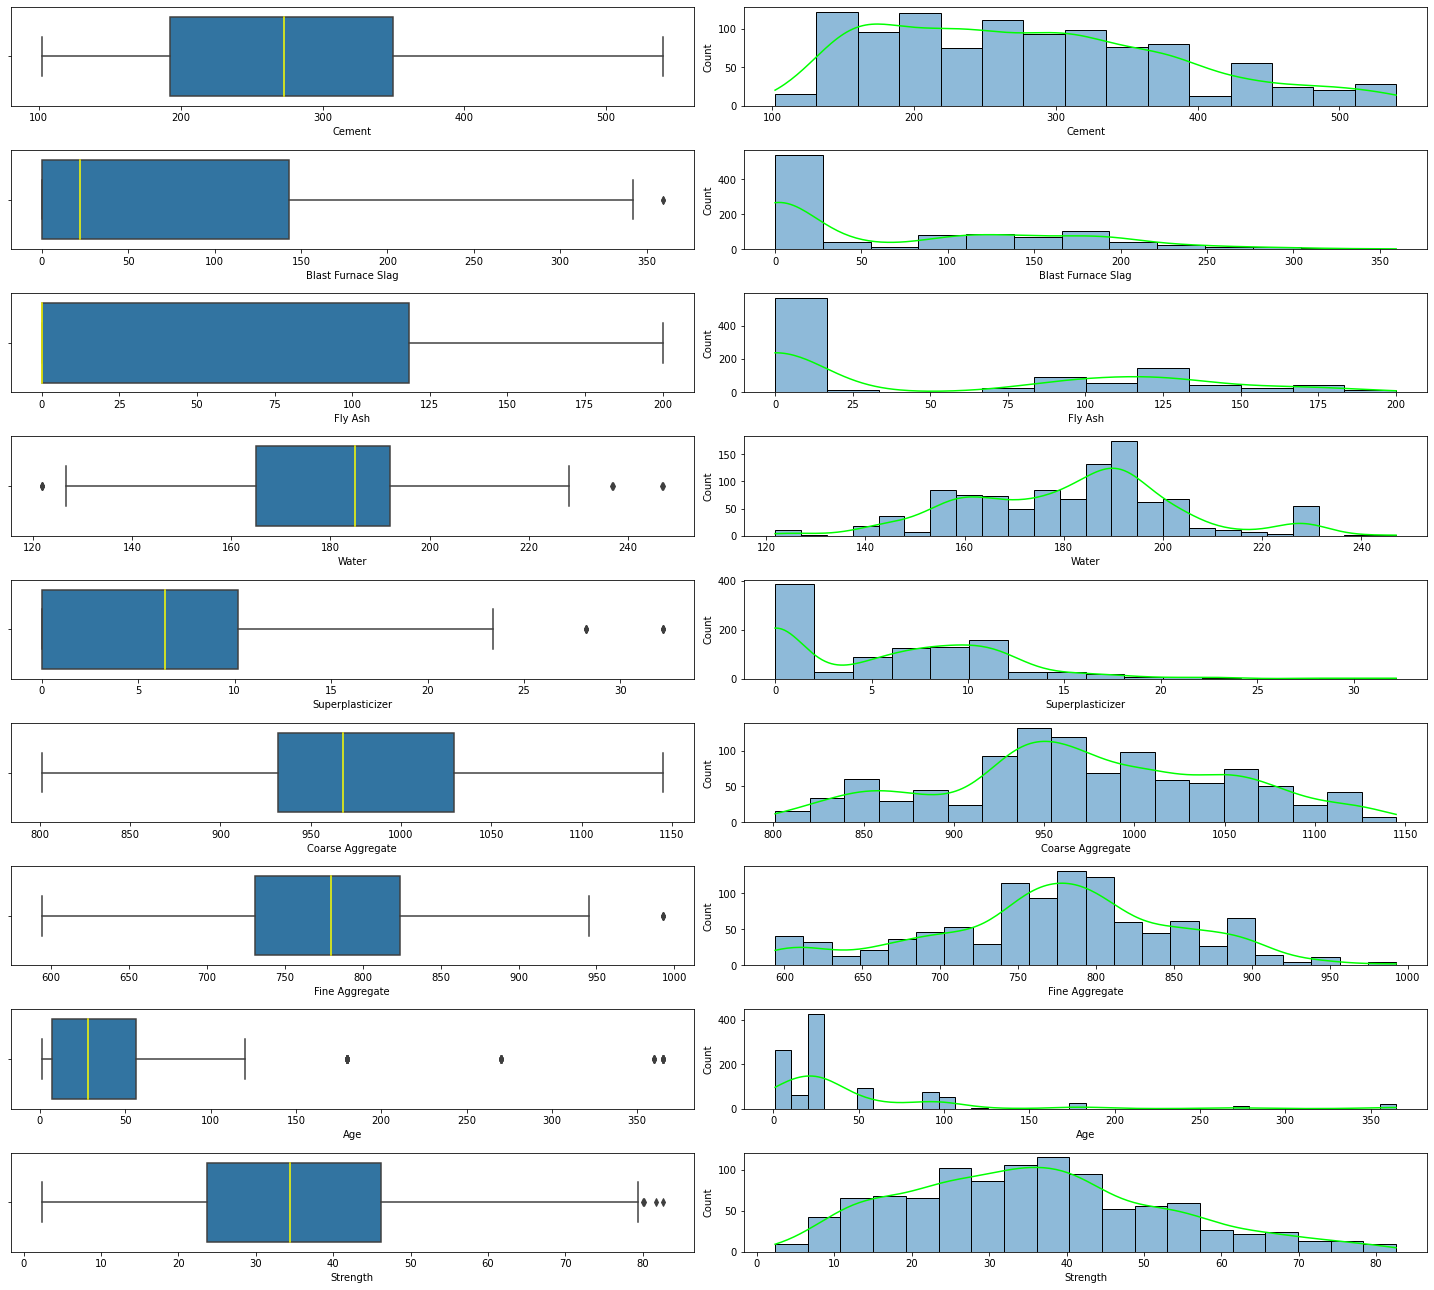

In [15]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
fig, axs = plt.subplots(len(num_cols), 2, figsize=(20, 2 * len(num_cols)))

for index, column_name in enumerate(num_cols):
    sns.boxplot(x=df[column_name], ax=axs[index][0])
    axs[index][0].get_lines()[4].set_color("yellow")

    sns.histplot(x=df[column_name], kde=True, ax=axs[index][1])
    axs[index][1].get_lines()[0].set_color("lime")

fig.tight_layout(pad=1.0)

## Анализ корреляций

In [16]:
corr = X.corr(method="spearman")
corr

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
Cement,1.000000,-0.245167,-0.418320,-0.094437,0.037919,-0.144880,-0.173596,0.004640
Blast Furnace Slag,-0.245167,1.000000,-0.253551,0.053360,0.098137,-0.348898,-0.302278,-0.017581
Fly Ash,-0.418320,-0.253551,1.000000,-0.283150,0.454091,0.058366,0.051307,0.002801
Water,-0.094437,0.053360,-0.283150,1.000000,-0.686923,-0.218487,-0.345614,0.090942
Superplasticizer,0.037919,0.098137,0.454091,-0.686923,1.000000,-0.198802,0.168313,-0.009525
Coarse Aggregate,-0.144880,-0.348898,0.058366,-0.218487,-0.198802,1.000000,-0.100480,-0.044928
Fine Aggregate,-0.173596,-0.302278,0.051307,-0.345614,0.168313,-0.100480,1.000000,-0.057362
Age,0.004640,-0.017581,0.002801,0.090942,-0.009525,-0.044928,-0.057362,1.000000


<AxesSubplot:>

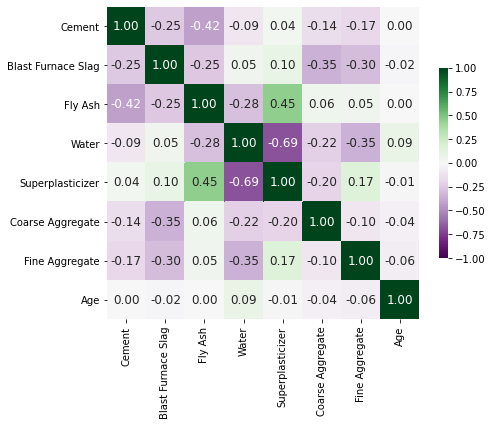

In [17]:
plt.figure(figsize=(7, 7))

sns.heatmap(
    corr,
    square=True,
    annot=True,
    fmt=".2f",
    cmap="PRGn",
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 12},
    robust=True,
    vmin=-1,
    vmax=1,
)

## Анализ отсутствующих значений

In [18]:
X.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
dtype: int64

In [19]:
y.isna().sum()

0

Выводы: Отсутствующих значений нет.

## Важные параметры [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

- `n_estimators: int, default=100`
    - Количество деревьев в лесу.
    
    
- `criterion: {"mse", "mae"}, default="mse"`
    - Функция измерения качества разделения.
    - Поддерживаемые критерии: `"mse"` для среднеквадратичной ошибки, которая равна уменьшению дисперсии в качестве критерия выбора признаков, и `"mae"` для средней абсолютной ошибки.
    
    
- `max_depth: int, default=None`
    - Максимальная глубина дерева.
    - Если `None`, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать менее `min_samples_split` выборок.
    
   
- `min_samples_split: int или float, default=2`
    - Минимальное количество выборок, необходимое для разделения внутреннего узла:
        - Если `int`, то считает `min_samples_split` минимальным числом.
        - Если `float`, то `min_samples_split` - это дробь, а `ceil(min_samples_split * n_samples)` - минимальное количество выборок для каждого разделения.
        
        
- `min_samples_leaf: int or float, default=1`
    - Минимальное количество выборок, которое требуется для конечного узла.
    - Точка разделения на любой глубине будет учитываться только в том случае, если она оставляет не менее `min_samples_leaf` обучающих выборок в каждой из левой и правой ветвей. Это может иметь эффект сглаживания модели, особенно при регрессии.
    - Если `int`, то считает `min_samples_leaf` минимальным числом.
    - Если `float`, то `min_samples_leaf` - дробная часть, а `ceil(min_samples_leaf * n_samples)` - минимальное количество выборок для каждого узла.
    
    
- `min_weight_fraction_leaf: float, default=0.0`


- `max_features: {"auto", "sqrt", "log2"}, int or float, default="auto"`


- `max_leaf_nodes: int, default=None`
    - Выращивает деревья с `max_leaf_nodes` способом "лучший первый" (best-first).
    - Лучшие узлы определяются как относительное уменьшение "загрязнения" (impurity).
    - Если `None`, то неограниченное количество конечных узлов.

## Обучение модели (Train) - manual

In [20]:
# импортировать пакет RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# создать объект RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, max_depth=5)

# обучить модель
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10)

## Оценка качества модели (Evaluation)

In [21]:
# использовать обученную модель для предсказания на test выборке
y_test_predicted = model.predict(X_test)
y_train_predicted = model.predict(X_train)

In [22]:
print(f"R2 (train): {r2_score(y_train, y_train_predicted)}")
print(f"R2 (test): {r2_score(y_test, y_test_predicted)}")

print(f"MSE (train): {mean_squared_error(y_train, y_train_predicted, squared=True)}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_predicted, squared=True)}")

R2 (train): 0.8848313107121714
R2 (test): 0.799517763403672
MSE (train): 32.00852078618796
MSE (test): 55.97775887910837


Для визуализации необходимо установить [`Graphviz`](https://graphviz.gitlab.io/download/).

In [23]:
from sklearn.tree import export_graphviz
import os

for i, est in enumerate(model.estimators_):
    export_graphviz(
        est,
        out_file=f"tmp/rf_tree_{i}.dot",
        feature_names=X_train.columns.to_list(),
        class_names=y_train.name,
        rounded=True,
        proportion=False,
        precision=2,
        special_characters=True,
        filled=True,
    )
    os.system(f"dot -Tpng tmp/rf_tree_{i}.dot -o tmp/rf_tree_{i}.png")

In [47]:
# TODO: json можем сохранять дерево?

## Важность признаков

### Важность признаков на основе среднего уменьшения примесей (mean decrease in impurity)

Важность признаков обеспечивается соответствующим атрибутом `feature_importances_`, и они вычисляются как среднее значение и стандартное отклонение накопления уменьшения примесей в каждом дереве.

**ВНИМАНИЕ:** Важность признаков на основе примесей может вводить в заблуждение для **признаков с высокой мощностью** (много уникальных значений).

In [24]:
feature_names = X_train.columns
feature_names

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [25]:
importances = model.feature_importances_
importances

array([0.31178463, 0.04428662, 0.01679921, 0.12690681, 0.06811076,
       0.01391514, 0.03444911, 0.38374772])

In [26]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

std

array([0.09661915, 0.02258073, 0.02359623, 0.06272504, 0.06250394,
       0.01424188, 0.02960064, 0.04881785])

In [48]:
forest_importances = pd.Series(importances, index=feature_names)
forest_importances

Cement                0.311785
Blast Furnace Slag    0.044287
Fly Ash               0.016799
Water                 0.126907
Superplasticizer      0.068111
Coarse Aggregate      0.013915
Fine Aggregate        0.034449
Age                   0.383748
dtype: float64

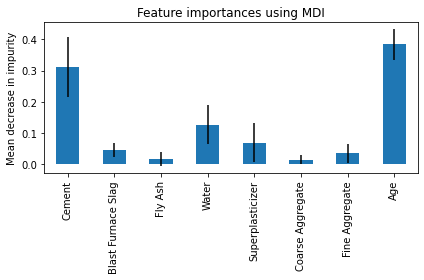

In [27]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Важность признаков на основе перестановки признаков (feature permutation)

Такой подход преодолевает ограничения важности признака на основе примесей: признаки не имеют предвзятости в сторону признаков с высокой мощностью и могут быть вычислены на оставленном наборе тестов.

[sklearn.inspection.permutation_importance](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html)

Вычисление важности полной перестановки **более затратно: признаки перемешиваются `n` раз**, и модель перестраивается, чтобы оценить их важность.

При использовании обоих методов одни и те же признаки определяются как наиболее важные. Хотя относительные значения различаются.

In [28]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10)

result

{'importances_mean': array([0.41580798, 0.05250017, 0.00705799, 0.16405684, 0.06120924,
        0.0082948 , 0.03411924, 0.73363901]),
 'importances_std': array([0.02589084, 0.00839365, 0.00416231, 0.01484734, 0.00737392,
        0.00222776, 0.00642514, 0.04225129]),
 'importances': array([[ 4.32074992e-01,  4.43451460e-01,  4.14655296e-01,
          4.40426465e-01,  3.95461559e-01,  3.54050197e-01,
          4.28589497e-01,  4.21930432e-01,  3.95977237e-01,
          4.31462696e-01],
        [ 4.26406533e-02,  5.66778149e-02,  6.65301656e-02,
          5.38010221e-02,  4.29035165e-02,  3.80375809e-02,
          6.10688471e-02,  5.38398364e-02,  5.32140765e-02,
          5.62881552e-02],
        [ 9.85005162e-03,  1.32517378e-02,  8.74270048e-03,
          1.00493930e-02,  2.01902224e-03, -5.46810534e-04,
          1.05898300e-02,  6.98343965e-03,  2.63110294e-03,
          7.00945066e-03],
        [ 1.85403263e-01,  1.76278282e-01,  1.59960936e-01,
          1.64801199e-01,  1.38476326

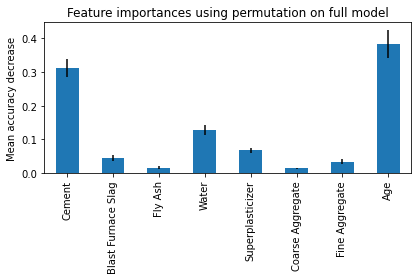

In [29]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

### [SHAP](https://github.com/slundberg/shap)

TODO

TODO: получить важность показателей ТОЛЬКО для ошибочно определенных прогнозов? 

In [30]:
shap.initjs()

In [31]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

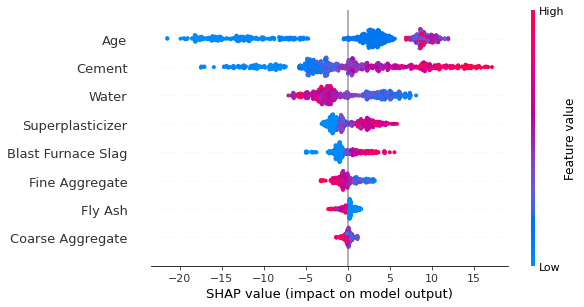

In [32]:
shap.summary_plot(shap_values, X_train)

## Feature Selection

In [33]:
selector = SelectKBest(score_func=mutual_info_regression, k=6).fit(X_train, y_train)

In [34]:
X_train_new = selector.transform(X_train)
X_train_new

array([[ 150. ,  237. ,  174. ,   12. , 1069. ,   28. ],
       [ 218.9,    0. ,  158.5,   11.3, 1078.7,   14. ],
       [ 339. ,    0. ,  197. ,    0. ,  968. ,  365. ],
       ...,
       [ 190.3,    0. ,  166.6,    9.9, 1079. ,  100. ],
       [ 475. ,  118.8,  181.1,    8.9,  852.1,   28. ],
       [ 314. ,    0. ,  170. ,   10. ,  925. ,   28. ]])

In [49]:
feat_scores = pd.DataFrame(
    {"score": selector.scores_}, index=X_train.columns
).sort_values(by="score", ascending=False)
feat_scores

,score
Water,0.322945
Age,0.313752
Cement,0.224695
Blast Furnace Slag,0.193425
Superplasticizer,0.179313
Coarse Aggregate,0.164665
Fine Aggregate,0.148220
Fly Ash,0.045571


<AxesSubplot:>

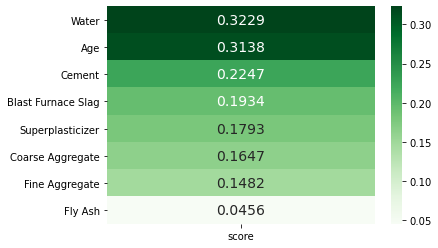

In [36]:
sns.heatmap(feat_scores, annot=True, annot_kws={"size": 14}, fmt="1.4f", cmap="Greens")

## Обучение модели (Train) - pipeline

In [37]:
param_grid = {
    "model__max_depth": [5, 8, 11],
    "model__n_estimators": [50, 100],
    "model__criterion": ["mse", "mae"],
}

In [38]:
pipeline = Pipeline(
    steps=[
        #             ('fs', SelectKBest(score_func=f_regression, k=5)),
        ("fs", SelectKBest(score_func=mutual_info_regression, k=6)),
        ("model", RandomForestRegressor()),
    ]
)

In [39]:
model_gs = GridSearchCV(
    pipeline, param_grid, scoring="neg_mean_squared_error", n_jobs=-1
)

In [40]:
model_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('fs',
                                        SelectKBest(k=6,
                                                    score_func=<function mutual_info_regression at 0x7fa2d4b71280>)),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['mse', 'mae'],
                         'model__max_depth': [5, 8, 11],
                         'model__n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [41]:
print(f"best_params: {model_gs.best_params_}")
print(f"best_score: {model_gs.best_score_:0.2f}")

best_params: {'model__criterion': 'mse', 'model__max_depth': 11, 'model__n_estimators': 100}
best_score: -29.64


In [42]:
pd.DataFrame(model_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.308624,0.070156,0.019963,0.008361,mse,5,50,"{'model__criterion': 'mse', 'model__max_depth'...",-49.350516,-41.640481,-56.056977,-47.246881,-43.058078,-47.470586,5.114111,9
1,0.556331,0.040206,0.032223,0.010293,mse,5,100,"{'model__criterion': 'mse', 'model__max_depth'...",-49.929516,-40.150541,-58.399020,-48.536326,-42.270667,-47.857214,6.426315,10
2,0.286650,0.080756,0.011845,0.002940,mse,8,50,"{'model__criterion': 'mse', 'model__max_depth'...",-33.195082,-29.105016,-39.298981,-26.923148,-29.694053,-31.643256,4.325269,6
3,0.572218,0.035552,0.030572,0.007493,mse,8,100,"{'model__criterion': 'mse', 'model__max_depth'...",-33.486588,-29.173337,-38.459597,-30.009690,-26.461190,-31.518080,4.132914,5
4,0.319541,0.023610,0.016329,0.001331,mse,11,50,"{'model__criterion': 'mse', 'model__max_depth'...",-34.544657,-25.724286,-37.844938,-25.290390,-26.309521,-29.942759,5.220390,2
5,0.540478,0.017000,0.026908,0.002925,mse,11,100,"{'model__criterion': 'mse', 'model__max_depth'...",-32.011745,-27.092755,-38.451336,-24.795088,-25.865762,-29.643337,5.049183,1
6,0.771779,0.007557,0.017444,0.004256,mae,5,50,"{'model__criterion': 'mae', 'model__max_depth'...",-52.274907,-42.793471,-57.701887,-50.719940,-48.063694,-50.310780,4.903325,12
7,1.462445,0.033774,0.025239,0.001759,mae,5,100,"{'model__criterion': 'mae', 'model__max_depth'...",-52.524664,-42.898003,-54.770332,-49.925469,-48.589254,-49.741544,4.030636,11
8,0.938868,0.014384,0.016603,0.002310,mae,8,50,"{'model__criterion': 'mae', 'model__max_depth'...",-36.376631,-32.940018,-37.853274,-32.558499,-29.566566,-33.858997,2.941208,7
9,1.830834,0.180384,0.028889,0.002432,mae,8,100,"{'model__criterion': 'mae', 'model__max_depth'...",-37.906590,-31.216440,-39.433493,-31.752986,-29.310957,-33.924093,3.988481,8


## Оценка качества модели (Evaluation)

In [43]:
y_test_predicted = model_gs.predict(X_test)
y_train_predicted = model_gs.predict(X_train)

In [44]:
print(f"R2 (train): {r2_score(y_train, y_train_predicted)}")
print(f"R2 (test): {r2_score(y_test, y_test_predicted)}")

print(f"MSE (train): {mean_squared_error(y_train, y_train_predicted, squared=True)}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_predicted, squared=True)}")

R2 (train): 0.9821556520330743
R2 (test): 0.8873612714453296
MSE (train): 4.9594311296522955
MSE (test): 31.450485063065003
